In [10]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import prepare
import wrangle_zillow

print("Success")

Success


# Tips
Visualize and perform at least 1 t-test and 1 chi square test on the tips data set

In [11]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


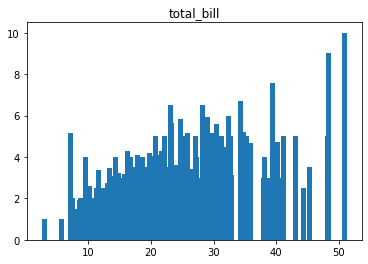

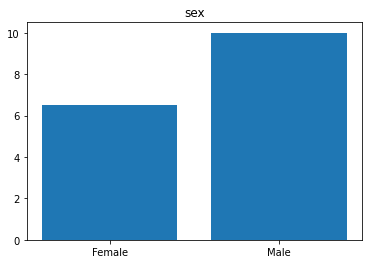

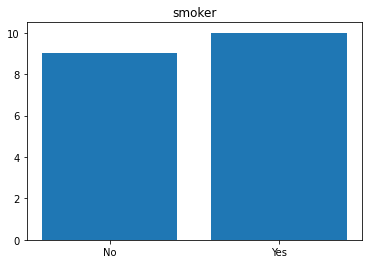

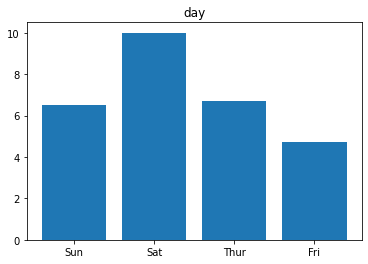

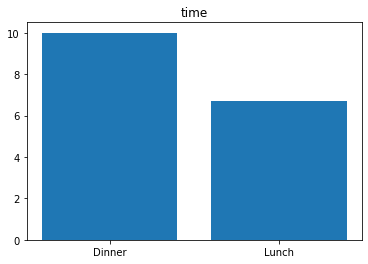

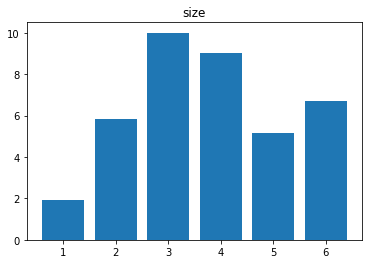

In [25]:
columns = list(tips.columns.drop('tip'))
for col in columns:
    plt.bar(tips[col], tips['tip'])
    plt.title(col)
    plt.show()

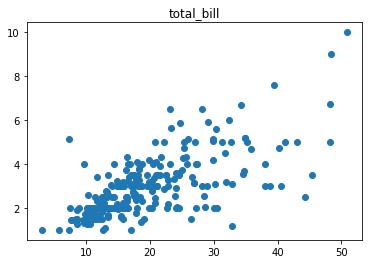

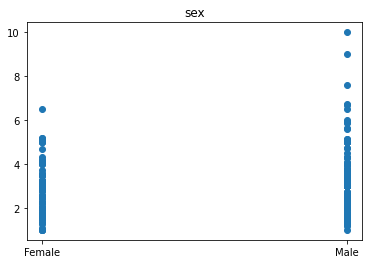

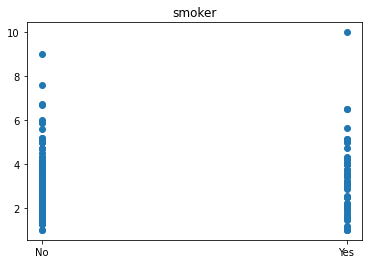

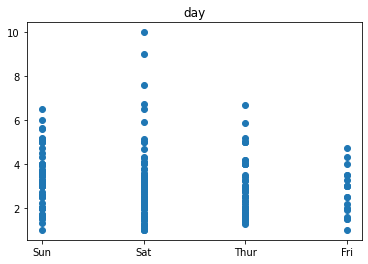

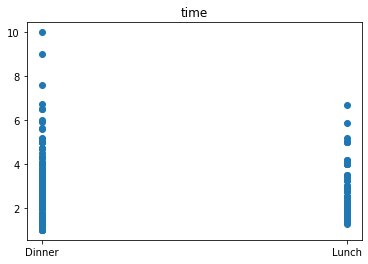

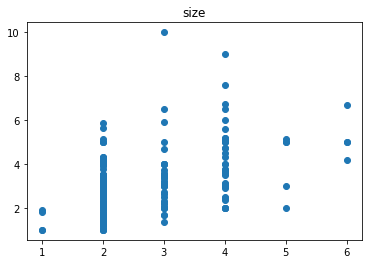

In [26]:
columns = list(tips.columns.drop('tip'))
for col in columns:
    plt.scatter(tips[col], tips['tip'])
    plt.title(col)
    plt.show()

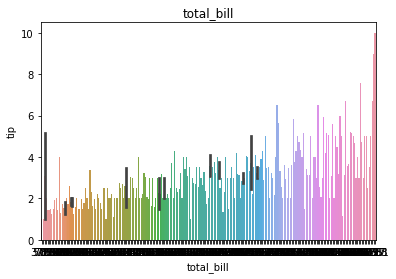

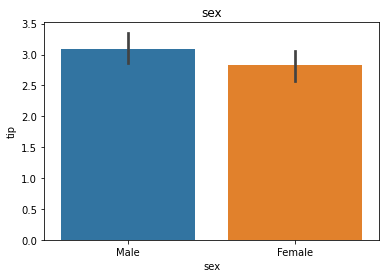

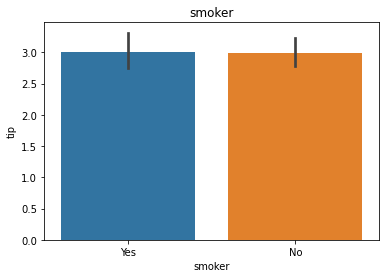

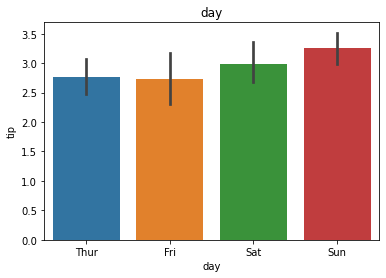

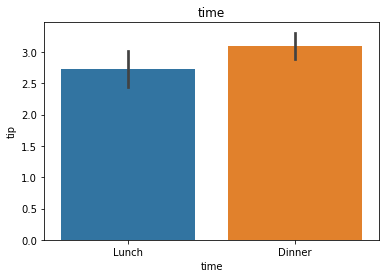

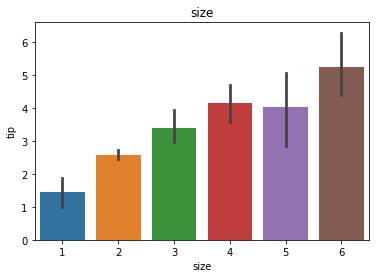

In [27]:
columns = list(tips.columns.drop('tip'))
for col in columns:
    sns.barplot(tips[col], tips['tip'])
    plt.title(col)
    plt.show()

## Tips t-test 

### Men vs Women
- $H0$: Men's and women's average tip amount is the same
- $Ha$: Men's average tip amount are different (Two Tail)

In [32]:
#

men = tips.loc[tips['sex'] == "Male"]
women = tips.loc[tips['sex'] == "Female"]
a = .05

t, p = stats.ttest_ind(men.tip, women.tip)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < a? ", p/2 < a)
print("is t > 0? ", t > 0)
if p > a:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

T = 1.3878597054212687, p/2= 0.08322811751728382
is p/2 < a?  False
is t > 0?  True
We fail to reject $H_{0}$


### Smokers 
- $H0$: Smokers and nonsmokers average tip amount is the same
- $Ha$: Smokers and nonsmokers average tip amount are different (Two Tail)

In [33]:
# Smokers

smoker = tips.loc[tips['smoker'] == "Yes"]
nonsmoker = tips.loc[tips['smoker'] == "No"]
a = .05

t, p = stats.ttest_ind(smoker.tip, nonsmoker.tip)
print(f"T = {t}, p/2= {p/2}")
print("is p/2 < a? ", p/2 < a)
print("is t > 0? ", t > 0)
if p > a:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

T = 0.09222805186888201, p/2= 0.4632965761122488
is p/2 < a?  False
is t > 0?  True
We fail to reject $H_{0}$


## Chi Squared

### Sex Dinner/Lunch

- $H0$ There is no relationship between sex and time
- $Ha$ There is a relationship between sex and time

In [35]:
observed = pd.crosstab(tips['sex'], tips['time'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

9.343808982970623 0.002237400118075248
Reject H0


### Sex and Smoker

- $H0$ There is no relationship between sex and smoker
- $Ha$ There is a relationship between sex and smoker

In [37]:
observed = pd.crosstab(tips['sex'], tips['smoker'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p)
if p < .05:
    print('Reject H0')
else:
    print("Fail to reject H0")

0.008763290531773594 0.925417020494423
Fail to reject H0
